In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import psycopg2
import re

In [2]:
try:
    conn = psycopg2.connect("dbname='spatial' user='postgres' host='localhost' password='deeznuts'")
except:
    print("cant connect to the database")

In [3]:
#Airport distance attribute
sql1 = '''select a.distance, p.rrdistance, s.total_area, s.aprland, s.price from       volusia.airport_distance a  
    inner join volusia.parcel p on p.parid = a.parid 
	inner join volusia.sales_analysis s on s.parid = a.parid
	where p.rrdistance < 401 and s.rmbed = 3 and s.luc = '0100';'''
airport_frame = pd.read_sql_query(sql1, conn)
airport_frame = airport_frame.dropna()

In [4]:
airport_frame.head()

,distance,rrdistance,total_area,aprland,price
0,1.036991,212.365967,1932.0,10881.0,159900.0
1,2.001974,294.448294,3576.0,18810.0,380000.0
2,2.001974,294.448294,3576.0,18810.0,389000.0
3,1.311620,106.837516,1558.0,10500.0,81400.0
4,0.463636,164.284406,2100.0,19125.0,180000.0


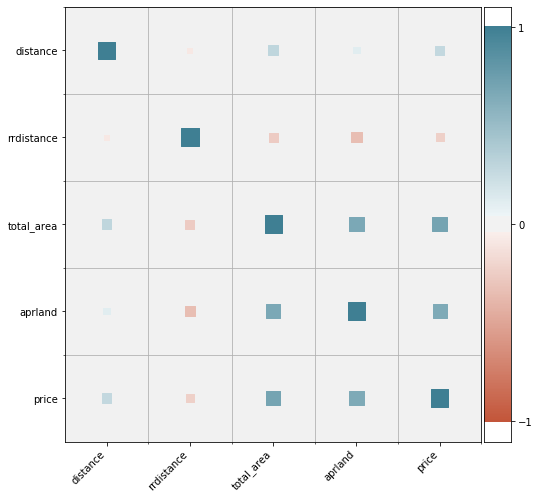

In [5]:
from heatmap import heatmap, corrplot
plt.figure(figsize=(8,8))
corrplot(airport_frame.corr(), size_scale=300)

In [6]:
#Slight positive correlation on airport distance to price
airport_frame.corr()

,distance,rrdistance,total_area,aprland,price
distance,1.000000,-0.078393,0.301072,0.121554,0.279944
rrdistance,-0.078393,1.000000,-0.257568,-0.343996,-0.224299
total_area,0.301072,-0.257568,1.000000,0.676942,0.705471
aprland,0.121554,-0.343996,0.676942,1.000000,0.662699
price,0.279944,-0.224299,0.705471,0.662699,1.000000


In [7]:
sql2 = ''' select c.scdistance, p.rrdistance, s.total_area, s.aprland, s.price from volusia.school_distance c 
	inner join volusia.parcel p on p.parid = c.parid
	inner join volusia.sales_analysis s on s.parid = c.parid
	where p.rrdistance < 401 and s.rmbed = 3 and s.luc = '0100' '''
school_frame = pd.read_sql_query(sql2, conn)
school_frame = school_frame.dropna()

In [8]:
school_frame.head()

,scdistance,rrdistance,total_area,aprland,price
0,0.415236,72.591037,1842.0,21067.0,130000.0
1,0.515740,337.896718,1831.0,18600.0,83000.0
2,1.163367,377.398954,1940.0,11900.0,115000.0
3,0.805158,233.558046,1347.0,6073.0,57000.0
4,2.069364,244.323043,2280.0,66010.0,240000.0


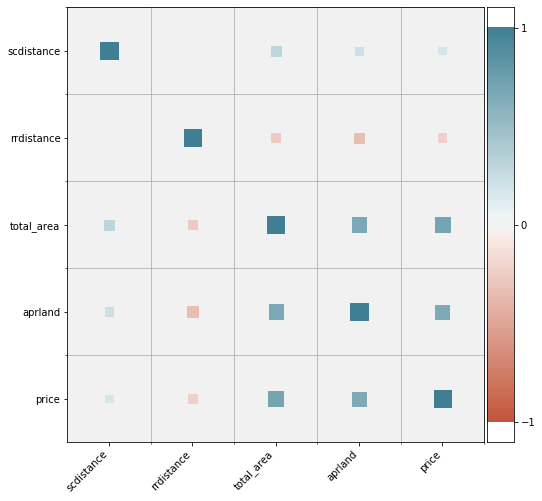

In [9]:
plt.figure(figsize=(8,8))
corrplot(school_frame.corr(), size_scale=300)

In [10]:
#Distance to school has a slight correlation with total_Area and apr for the land
school_frame.corr()

,scdistance,rrdistance,total_area,aprland,price
scdistance,1.000000,-0.047958,0.309497,0.225570,0.182449
rrdistance,-0.047958,1.000000,-0.257568,-0.343996,-0.224299
total_area,0.309497,-0.257568,1.000000,0.676942,0.705471
aprland,0.225570,-0.343996,0.676942,1.000000,0.662699
price,0.182449,-0.224299,0.705471,0.662699,1.000000


In [11]:
#Hospital distance
sql3 = '''select h.hdistance, p.rrdistance, s.total_area, s.aprland, s.price from volusia.hospital_distance h 
	inner join volusia.parcel p on p.parid = h.parid
	inner join volusia.sales_analysis s on s.parid = h.parid
	where p.rrdistance < 401 and s.rmbed = 3 and s.luc = '0100' ;'''
hospital_frame = pd.read_sql_query(sql3, conn)
hospital_frame = hospital_frame.dropna()

In [12]:
hospital_frame.head()

,hdistance,rrdistance,total_area,aprland,price
0,0.801640,298.699812,2187.0,30000.0,242400.0
1,0.945182,58.305347,3040.0,30000.0,229500.0
2,1.037597,330.485083,2079.0,19130.0,215000.0
3,1.037597,330.485083,2079.0,19130.0,175000.0
4,0.949983,310.205036,2163.0,26400.0,150000.0


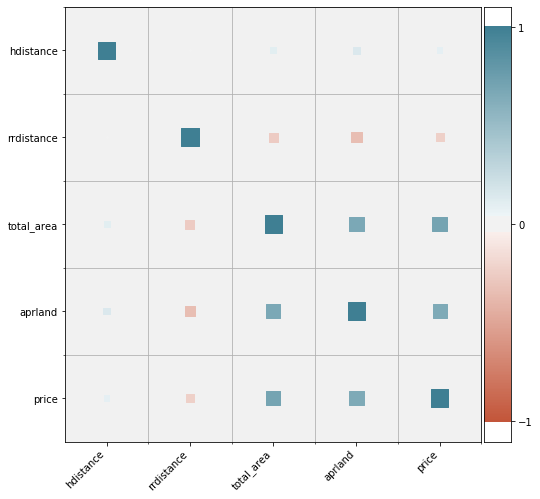

In [13]:
plt.figure(figsize=(8,8))
corrplot(hospital_frame.corr(), size_scale=300)

In [14]:
hospital_frame.corr()

,hdistance,rrdistance,total_area,aprland,price
hdistance,1.000000,0.005053,0.109879,0.146140,0.090613
rrdistance,0.005053,1.000000,-0.257568,-0.343996,-0.224299
total_area,0.109879,-0.257568,1.000000,0.676942,0.705471
aprland,0.146140,-0.343996,0.676942,1.000000,0.662699
price,0.090613,-0.224299,0.705471,0.662699,1.000000


In [15]:
#Grocery store distance
sql4 = '''select g.groc_distance, p.rrdistance, s.total_area, s.aprland, s.price from volusia.groceries_distance g 
	inner join volusia.parcel p on p.parid = g.parid
	inner join volusia.sales_analysis s on s.parid = g.parid
	where p.rrdistance < 401 and s.rmbed = 3 and s.luc = '0100' ;'''
groceries_frame = pd.read_sql_query(sql4, conn)
groceries_frame = groceries_frame.dropna()

In [16]:
groceries_frame.head()

,groc_distance,rrdistance,total_area,aprland,price
0,0.311523,335.786687,3510.0,58825.0,268000.0
1,3.330997,286.983385,2616.0,22500.0,215000.0
2,1.972784,330.341155,3996.0,70000.0,370000.0
3,5.615308,48.313218,4444.0,71050.0,45000.0
4,3.457410,249.212481,2360.0,30000.0,237500.0


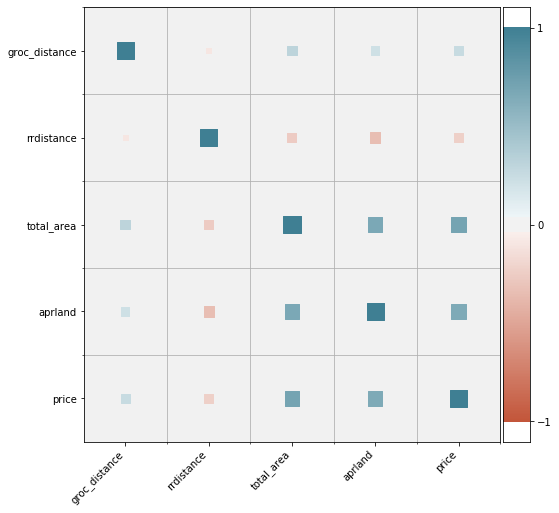

In [17]:
plt.figure(figsize=(8,8))
corrplot(groceries_frame.corr(), size_scale=300)

In [18]:
#Crime distance
sql5 = '''select c.crime_dist, p.rrdistance, s.total_area, s.aprland, s.price from volusia.crime_sales_analysis c 
	inner join volusia.parcel p on p.parid = c.parid
	inner join volusia.sales_analysis s on s.parid = c.parid
	where p.rrdistance < 401 and s.rmbed = 3 and s.luc = '0100'; '''
crime_frame = pd.read_sql_query(sql5, conn)
crime_frame = crime_frame.dropna()

In [19]:
crime_frame.head()

,crime_dist,rrdistance,total_area,aprland,price
0,0.036565,377.635779,1672.0,23520.0,107000.0
1,0.251811,69.258499,2209.0,30000.0,225100.0
2,0.298584,324.843365,2387.0,30000.0,238300.0
3,0.205838,400.033735,2560.0,30000.0,258300.0
4,0.296596,385.247950,2552.0,30000.0,236400.0


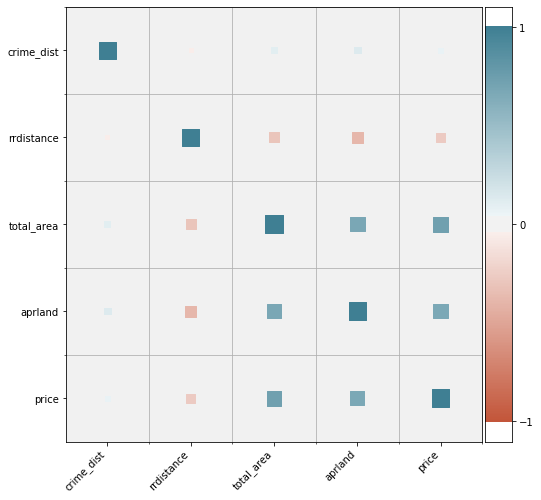

In [20]:
plt.figure(figsize=(8,8))
corrplot(crime_frame.corr(), size_scale=300)

In [21]:
#Crime seems to have a small correlation with price and aprland
crime_frame.corr()

,crime_dist,rrdistance,total_area,aprland,price
crime_dist,1.000000,-0.045073,0.111387,0.131369,0.073730
rrdistance,-0.045073,1.000000,-0.295398,-0.384566,-0.263761
total_area,0.111387,-0.295398,1.000000,0.682837,0.734804
aprland,0.131369,-0.384566,0.682837,1.000000,0.677052
price,0.073730,-0.263761,0.734804,0.677052,1.000000


In [22]:
#All attributes
sql6 = '''select a.distance,  p.rrdistance, s.total_area, s.aprland, s.price, e.scdistance, h.hdistance, g.groc_distance, c.crime_dist from volusia.airport_distance a 
	inner join volusia.parcel p on p.parid = a.parid
	inner join volusia.sales_analysis s on s.parid = a.parid
	inner join volusia.school_distance e on e.parid = a.parid
	inner join volusia.hospital_distance h on h.parid = a.parid
	inner join volusia.groceries_distance g on g.parid = a.parid
	inner join volusia.crime_sales_analysis c on c.parid = a.parid
	where p.rrdistance < 401 and s.rmbed = 3 and s.luc = '0100'; '''

df = pd.read_sql_query(sql6, conn)
df = df.dropna()

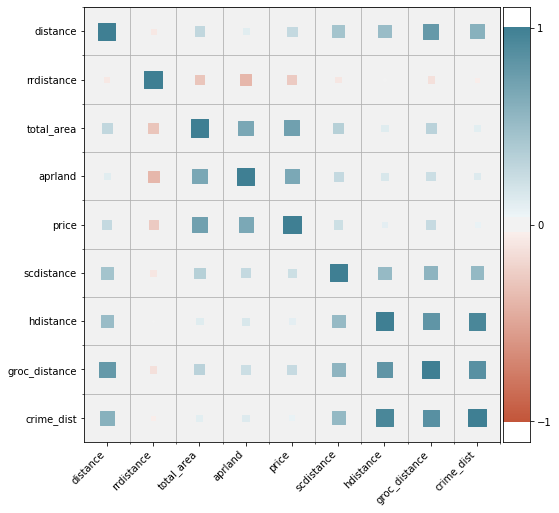

In [23]:
plt.figure(figsize=(8,8))
corrplot(df.corr(), size_scale=300)

In [24]:
#Linear Regression for airport distance
x_airport = airport_frame.drop(['price'], axis=1)
Y_airport = airport_frame['price']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x_airport, Y_airport, test_size = 0.3,
                                                    random_state=5)

In [26]:
print(x_train.shape)
print(Y_train.shape)

(177, 4)
(177,)


In [27]:
print(x_test.shape)
print(Y_test.shape)

(77, 4)
(77,)


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.6178


3577491457.6887803


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Airport Distance)')

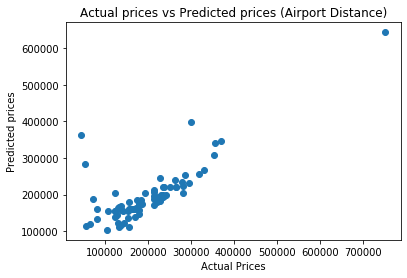

In [30]:
from sklearn.metrics import mean_squared_error
price_pred = model.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Airport Distance)")

In [31]:
#Linear Regression for school distance
x_school = school_frame.drop(['price'], axis=1)
Y_school = school_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_school, Y_school, test_size = 0.3,
                                                    random_state=5)
model = LinearRegression()
model.fit(x_train, Y_train)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))


R-squared: 0.2827


2911833583.1210475


Text(0.5, 1.0, 'Actual prices vs Predicted prices (School Distance)')

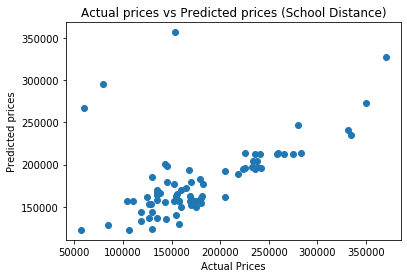

In [32]:
from sklearn.metrics import mean_squared_error
price_pred = model.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (School Distance)")

In [33]:
#Linear Regression Hospital Distance
x_hospital = hospital_frame.drop(['price'], axis=1)
Y_hospital = hospital_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_hospital, Y_hospital, test_size = 0.3,
                                                    random_state=5)
model = LinearRegression()
model.fit(x_train, Y_train)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.7158


2962619520.59165


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Hospital Distnace)')

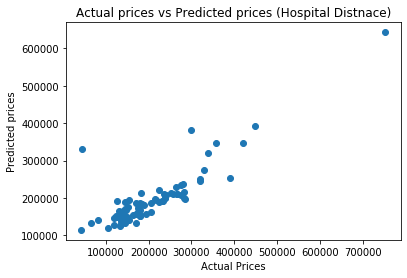

In [34]:
from sklearn.metrics import mean_squared_error
price_pred = model.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Hospital Distnace)")

In [35]:
#Linear Regression Grocery Store Distance
x_groceries = groceries_frame.drop(['price'], axis=1)
Y_groceries = groceries_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_groceries, Y_groceries, test_size = 0.3,
                                                    random_state=5)
model = LinearRegression()
model.fit(x_train, Y_train)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.6319


3888082323.178799


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Grocery Store Distance)')

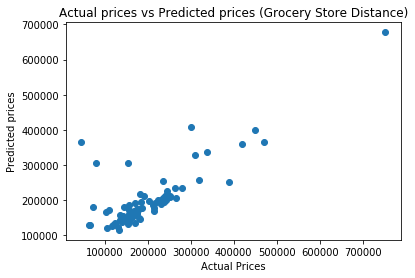

In [36]:
from sklearn.metrics import mean_squared_error
price_pred = model.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Grocery Store Distance)")

In [37]:
#Linear Regression Crime Distance
x_crime = crime_frame.drop(['price'], axis=1)
Y_crime = crime_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_crime, Y_crime, test_size = 0.3,
                                                    random_state=5)
model = LinearRegression()
model.fit(x_train, Y_train)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.6998


3082767655.971073


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Crime Distance)')

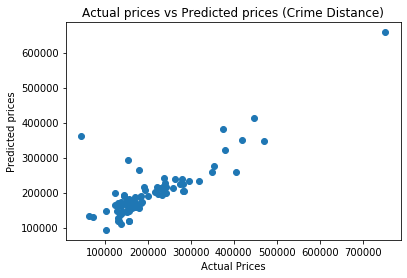

In [38]:
from sklearn.metrics import mean_squared_error
price_pred = model.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Crime Distance)")

In [39]:
#Crime and Hospital Distance seem to give high accuracy scores
# Full data model
x = df.drop(['price'], axis=1)
Y = df['price']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)
model = LinearRegression()
model.fit(x_train, Y_train)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.6874


3064000489.8146353


Text(0.5, 1.0, 'Actual prices vs Predicted prices (All attributes)')

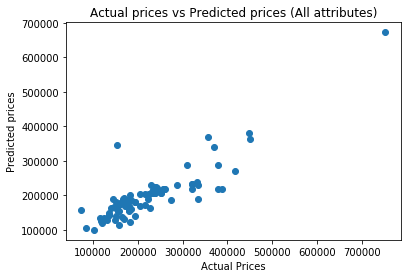

In [40]:
from sklearn.metrics import mean_squared_error
price_pred = model.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (All attributes)")

In [41]:
#KNN Regression for airport distance
from sklearn.neighbors import KNeighborsRegressor
x_airport = airport_frame.drop(['price'], axis=1)
Y_airport = airport_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_airport, Y_airport, test_size = 0.3,
                                                    random_state=5)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,Y_train)
print('R-squared: %.4f' % neigh.score(x_test,
                                      Y_test))

R-squared: 0.5767


3961922781.4155846


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Airports Distance )')

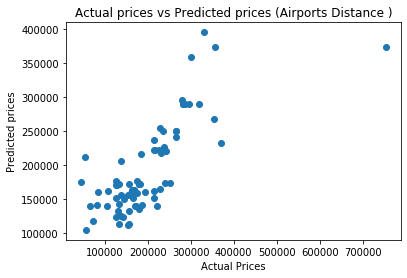

In [42]:
price_pred = neigh.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Airports Distance )")

In [43]:
#Linear Regression for school distance
x_school = school_frame.drop(['price'], axis=1)
Y_school = school_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_school, Y_school, test_size = 0.3,
                                                    random_state=5)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,Y_train)
print('R-squared: %.4f' % neigh.score(x_test,
                                      Y_test))

R-squared: 0.2607


3001111231.1688313


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Schools Distance)')

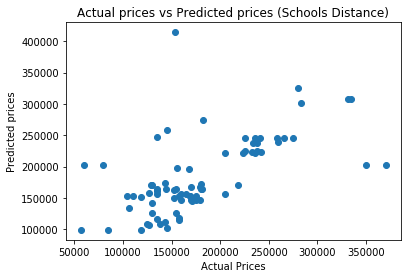

In [44]:
price_pred = neigh.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Schools Distance)")

In [45]:
#KNN Regression Hospital Distance
x_hospital = hospital_frame.drop(['price'], axis=1)
Y_hospital = hospital_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_hospital, Y_hospital, test_size = 0.3,
                                                    random_state=5)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,Y_train)
print('R-squared: %.4f' % neigh.score(x_test,
                                      Y_test))

R-squared: 0.4891


5325712877.519481


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Hospital Distance)')

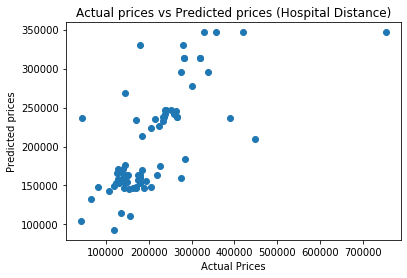

In [46]:
price_pred = neigh.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Hospital Distance)")

In [47]:
#KNN Regression Groceries
x_groceries = groceries_frame.drop(['price'], axis=1)
Y_groceries = groceries_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_groceries, Y_groceries, test_size = 0.3,
                                                    random_state=5)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,Y_train)
print('R-squared: %.4f' % neigh.score(x_test,
                                      Y_test))

R-squared: 0.5122


5152352695.701299


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Groceries Distance)')

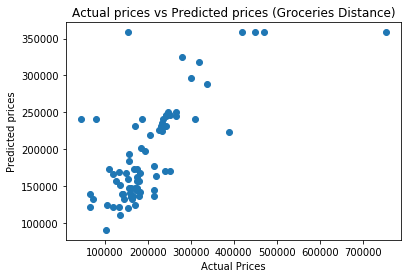

In [48]:
price_pred = neigh.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Groceries Distance)")

In [49]:
#KNN Regression Crime Distance
x_crime = crime_frame.drop(['price'], axis=1)
Y_crime = crime_frame['price']
x_train, x_test, Y_train, Y_test = train_test_split(x_crime, Y_crime, test_size = 0.3,
                                                    random_state=5)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,Y_train)
print('R-squared: %.4f' % neigh.score(x_test,
                                      Y_test))

R-squared: 0.5278


4848646452.685393


Text(0.5, 1.0, 'Actual prices vs Predicted prices (Crime Distance)')

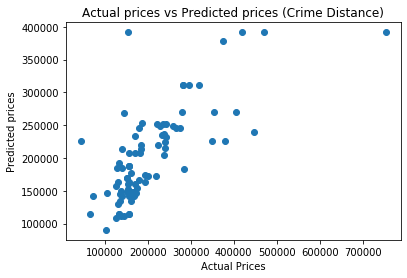

In [50]:
price_pred = neigh.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Crime Distance)")

In [51]:
# Full data model
x = df.drop(['price'], axis=1)
Y = df['price']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,Y_train)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.6874


5176953864.741123


Text(0.5, 1.0, 'Actual prices vs Predicted prices (All Attributes)')

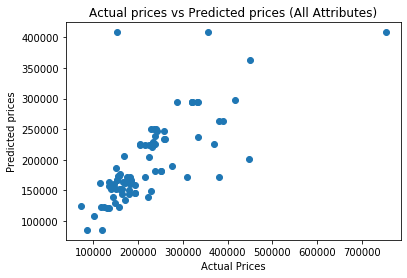

In [52]:
price_pred = neigh.predict(x_test)
mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (All Attributes)")

In [53]:
#Predicition will be based on crime, hospital distances in addition to total_area, aprland, and rrdistance
# Consistantly running the notebook shows that crime and hospital distance are one of the top variables on the basis on R-squared
sql7 = '''select c.crime_dist, p.rrdistance, s.total_area, s.aprland, s.price, h.hdistance from                 volusia.crime_sales_analysis c 
	inner join volusia.parcel p on p.parid = c.parid
	inner join volusia.sales_analysis s on s.parid = c.parid
	inner join volusia.hospital_distance h on h.parid = c.parid
	where p.rrdistance < 401 and s.rmbed = 3 and s.luc = '0100'; '''

df2 = pd.read_sql_query(sql7, conn)
df2 = df2.dropna()
df2.head()

,crime_dist,rrdistance,total_area,aprland,price,hdistance
0,0.264877,298.699812,2187.0,30000.0,242400.0,0.801640
1,0.292423,58.305347,3040.0,30000.0,229500.0,0.945182
2,0.094777,330.485083,2079.0,19130.0,215000.0,1.037597
3,0.094777,330.485083,2079.0,19130.0,215000.0,1.037597
4,0.094777,330.485083,2079.0,19130.0,175000.0,1.037597


In [54]:
 x_linear = df2.drop(['price'], axis=1)
 Y_linear = df2['price']
 print(x_linear.shape)
 print(Y_linear.shape)

(296, 5)
(296,)


In [55]:
x_linear_train, x_linear_test, Y_linear_train, Y_linear_test = train_test_split(x_linear, Y_linear, test_size = 0.3,
                                                    random_state=5)

In [56]:
print(x_linear_train.shape)
print(Y_linear_train.shape)
print(x_linear_test.shape)
print(Y_linear_test.shape)

(207, 5)
(207,)
(89, 5)
(89,)


In [57]:
linear_model = LinearRegression()
linear_model.fit(x_linear_train, Y_linear_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
#Meh R-Squared
print('R-squared: %.4f' % linear_model.score(x_linear_test,
                                      Y_linear_test))

R-squared: 0.4148


3457747292.3937974


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

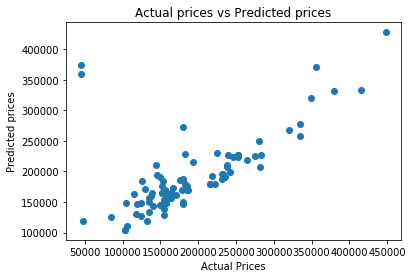

In [59]:
#Graph is much more succinct when dropping low R-Square variables
price_pred = linear_model.predict(x_linear_test)
mse = mean_squared_error(Y_linear_test, price_pred)
print(mse)

plt.scatter(Y_linear_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [60]:
#568 Dorset Cir, Daytona Beach, FL 32119
sql8 = '''select c.crime_dist, p.rrdistance, s.total_area, s.aprland, s.price, h.hdistance from                 volusia.crime_sales_analysis c 
	inner join volusia.parcel p on p.parid = c.parid
	inner join volusia.sales_analysis s on s.parid = c.parid
	inner join volusia.hospital_distance h on h.parid = c.parid
	where s.parid = '3459083'; '''
house1 = pd.read_sql_query(sql8, conn)
house1 = house1.dropna() 
house1.head()

,crime_dist,rrdistance,total_area,aprland,price,hdistance
0,0.258758,375.019769,1897.0,27500.0,170000.0,0.357482


In [61]:
# Zillow info: https://www.zillow.com/homes/568-Dorset-Cir-South-Daytona,-FL,-32119_rb/48040751_zpid/
x_house1 = house1.drop(['price'], axis=1)
linear_prediction_1 = linear_model.predict(x_house1)[0]
linear_actual_1 = house1['price'][0]
linear_difference_1 =  linear_actual_1 - linear_prediction_1
print("Predicted price: {}, Actual price: {}, Difference: {}".format(linear_prediction_1, linear_actual_1, linear_difference_1))

Predicted price: 174434.64529202454, Actual price: 170000.0, Difference: -4434.645292024536


In [62]:
#2461 Anastasia Dr, Daytona Beach, FL 32119
sql9 = '''select c.crime_dist, p.rrdistance, s.total_area, s.aprland, s.price, h.hdistance from                 volusia.crime_sales_analysis c 
	inner join volusia.parcel p on p.parid = c.parid
	inner join volusia.sales_analysis s on s.parid = c.parid
	inner join volusia.hospital_distance h on h.parid = c.parid
	where s.parid = '3436857'; '''
house2 = pd.read_sql_query(sql9, conn)
house2 = house2.dropna() 
house2.head()

,crime_dist,rrdistance,total_area,aprland,price,hdistance
0,0.066402,40.671942,1944.0,15408.0,169000.0,0.622858


In [63]:
# Zillow info: https://www.zillow.com/homes/2461-Anastasia-Dr-South-Daytona,-FL,-32119_rb/48038347_zpid/
x_house2 = house2.drop(['price'], axis=1)
linear_prediction_2 = linear_model.predict(x_house2)[0]
linear_actual_2 = house2['price'][0]
linear_difference_2 =  linear_actual_2 - linear_prediction_2
print("Predicted price: {}, Actual price: {}, Difference: {}".format(linear_prediction_2, linear_actual_2, linear_difference_2)) 

Predicted price: 162323.58894161604, Actual price: 169000.0, Difference: 6676.411058383965


In [64]:
#480 Redwood Ave, Orange City, FL 32763
sql10 = '''select c.crime_dist, p.rrdistance, s.total_area, s.aprland, s.price, h.hdistance from                 volusia.crime_sales_analysis c 
	inner join volusia.parcel p on p.parid = c.parid
	inner join volusia.sales_analysis s on s.parid = c.parid
	inner join volusia.hospital_distance h on h.parid = c.parid
	where s.parid = '5562671'; '''
house3 = pd.read_sql_query(sql10, conn)
house3 = house3.dropna() 
house3.head()

,crime_dist,rrdistance,total_area,aprland,price,hdistance
0,0.24,275.945378,1799.0,11093.0,132000.0,3.12421


In [65]:
# Zillow info: https://www.zillow.com/homes/480-Redwood-Ave-Orange-City,-FL,-32763_rb/47949499_zpid/
x_house3 = house3.drop(['price'], axis=1)
linear_prediction_3 = linear_model.predict(x_house3)[0]
linear_actual_3 = house3['price'][0]
linear_difference_3 =  linear_actual_3 - linear_prediction_3
print("Predicted price: {}, Actual price: {}, Difference: {}".format(linear_prediction_3, linear_actual_3, linear_difference_3)) 

Predicted price: 154597.64728334293, Actual price: 132000.0, Difference: -22597.64728334293


In [66]:
#287 E Fiesta Key Loop
sql11 = '''select c.crime_dist, p.rrdistance, s.total_area, s.aprland, s.price, h.hdistance from                 volusia.crime_sales_analysis c 
	inner join volusia.parcel p on p.parid = c.parid
	inner join volusia.sales_analysis s on s.parid = c.parid
	inner join volusia.hospital_distance h on h.parid = c.parid
	where s.parid = '8002023'; '''
house4 = pd.read_sql_query(sql11, conn)
house4 = house4.dropna() 
house4.head()

,crime_dist,rrdistance,total_area,aprland,price,hdistance
0,0.301164,217.13992,2376.0,30000.0,233200.0,0.89971


In [67]:
# Zillow info: https://www.zillow.com/homes/287-E-Fiesta-Key-Loop-Deland,-FL,-32720_rb/252438403_zpid/
x_house4 = house4.drop(['price'], axis=1)
linear_prediction_4 = linear_model.predict(x_house4)[0]
linear_actual_4 = house4['price'][0]
linear_difference_4 =  linear_actual_4 - linear_prediction_4
print("Predicted price: {}, Actual price: {}, Difference: {}".format(linear_prediction_4, linear_actual_4, linear_difference_4)) 

Predicted price: 205956.27410216173, Actual price: 233200.0, Difference: 27243.725897838274


In [68]:
#287 E Fiesta Key Loop
sql12 = '''select c.crime_dist, p.rrdistance, s.total_area, s.aprland, s.price, h.hdistance from                 volusia.crime_sales_analysis c 
	inner join volusia.parcel p on p.parid = c.parid
	inner join volusia.sales_analysis s on s.parid = c.parid
	inner join volusia.hospital_distance h on h.parid = c.parid
	where s.parid = '3555449'; '''
house5 = pd.read_sql_query(sql12, conn)
house5 = house5.dropna() 
house5.head()

,crime_dist,rrdistance,total_area,aprland,price,hdistance
0,0.023192,278.233923,1452.0,25245.0,150000.0,1.122226


In [69]:
#Zillow info: https://www.zillow.com/homes/1807-SEGRAVE-ST_rb/48047791_zpid/
x_house5 = house5.drop(['price'], axis=1)
linear_prediction_5 = linear_model.predict(x_house5)[0]
linear_actual_5 = house5['price'][0]
linear_difference_5 =  linear_actual_5 - linear_prediction_5
print("Predicted price: {}, Actual price: {}, Difference: {}".format(linear_prediction_5, linear_actual_5, linear_difference_5)) 

Predicted price: 143867.0951534612, Actual price: 150000.0, Difference: 6132.90484653879


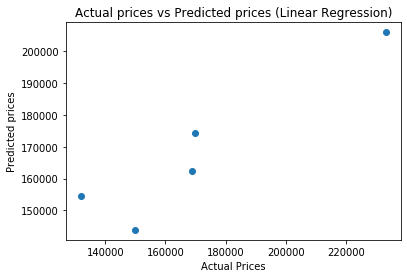

In [70]:
# Actual vs Predicted plot
x = np.array([linear_actual_1, linear_actual_2, linear_actual_3, linear_actual_4, linear_actual_5])
y = np.array([linear_prediction_1, linear_prediction_2, linear_prediction_3, linear_prediction_4, linear_prediction_5])
plt.scatter(x, y)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Linear Regression)")
plt.show() 

In [71]:
#Ignore the linear naming convention. Not sure why I did that it is coming from the same dataframe
#KNN modeling
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_linear_train,Y_linear_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [72]:
print('R-squared: %.4f' % neigh.score(x_linear_test,
                                      Y_linear_test))

R-squared: 0.3137


2027442849.1795504


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

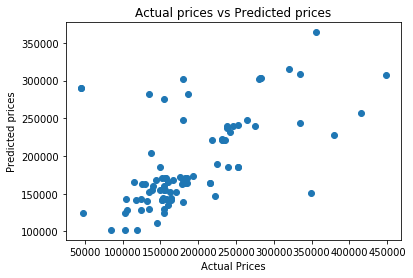

In [73]:
price_pred = neigh.predict(x_linear_test)
mse = mean_squared_error(Y_linear_test, price_pred)
print(mse**1/2)

plt.scatter(Y_linear_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [74]:
x_house1 = house1.drop(['price'], axis=1)
neigh_prediction_1 = neigh.predict(x_house1)[0]
neigh_actual_1 = house1['price'][0]
neigh_difference_1 =  neigh_actual_1 - neigh_prediction_1
print("Predicted price: {}, Actual price: {}, Difference: {}".format(neigh_prediction_1, neigh_actual_1, neigh_difference_1))

Predicted price: 163680.0, Actual price: 170000.0, Difference: 6320.0


In [75]:
x_house2 = house2.drop(['price'], axis=1)
neigh_prediction_2 = neigh.predict(x_house2)[0]
neigh_actual_2 = house2['price'][0]
neigh_difference_2 =  neigh_actual_2 - neigh_prediction_2
print("Predicted price: {}, Actual price: {}, Difference: {}".format(neigh_prediction_2, neigh_actual_2, neigh_difference_2))

Predicted price: 147760.0, Actual price: 169000.0, Difference: 21240.0


In [76]:
x_house3 = house3.drop(['price'], axis=1)
neigh_prediction_3 = neigh.predict(x_house3)[0]
neigh_actual_3 = house3['price'][0]
neigh_difference_3 =  neigh_actual_3 - neigh_prediction_3
print("Predicted price: {}, Actual price: {}, Difference: {}".format(neigh_prediction_3, neigh_actual_3, neigh_difference_3))

Predicted price: 150780.0, Actual price: 132000.0, Difference: -18780.0


In [77]:
x_house4 = house4.drop(['price'], axis=1)
neigh_prediction_4 = neigh.predict(x_house4)[0]
neigh_actual_4 = house4['price'][0]
neigh_difference_4 =  neigh_actual_4 - neigh_prediction_4
print("Predicted price: {}, Actual price: {}, Difference: {}".format(neigh_prediction_4, neigh_actual_4, neigh_difference_4))

Predicted price: 234460.0, Actual price: 233200.0, Difference: -1260.0


In [78]:
x_house5 = house5.drop(['price'], axis=1)
neigh_prediction_5 = neigh.predict(x_house5)[0]
neigh_actual_5 = house5['price'][0]
neigh_difference_5 =  neigh_actual_5 - neigh_prediction_5
print("Predicted price: {}, Actual price: {}, Difference: {}".format(neigh_prediction_5, neigh_actual_5, neigh_difference_5))

Predicted price: 167780.0, Actual price: 150000.0, Difference: -17780.0


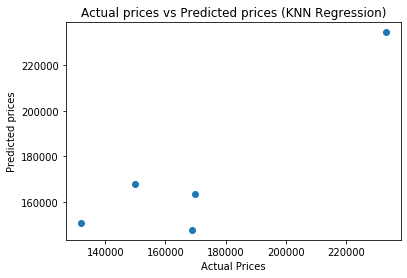

In [79]:
# Actual vs Predicted plot
#KNN Looks much more succinct and tends to have lower differences than linear regression (usually)
x = np.array([neigh_actual_1, neigh_actual_2, neigh_actual_3, neigh_actual_4, neigh_actual_5])
y = np.array([neigh_prediction_1, neigh_prediction_2, neigh_prediction_3, neigh_prediction_4, neigh_prediction_5])
plt.scatter(x, y)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (KNN Regression)")
plt.show() 

In [ ]:
# After running the notebook several times it seems that the Linear Regression model may be overfitting on the basis of differences